# Raman_hyperspectra use case
The experimental files can be downloaded upon: https://github.com/Bertin-fap/raman-hyperspectra-examples/tree/master/test_files

# spectra reading

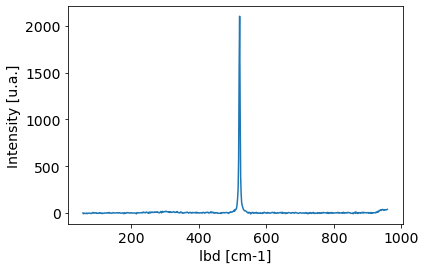

In [52]:
import raman_hyperspectra as rhp

file = "C:\\my_modules_Python\\rhp_demo_files\\RENISHAW_1D_Si.txt"
da_sliced, da_sliced_interp, da, da_interp = rhp.read_RAMAN_RENISHAW_txt_0D(file)
da_sliced_interp.plot()


In [53]:
print(f"tool: {da_sliced.attrs['tool']}", 
      f"mean spectral resolution: {da_sliced.lbd.attrs['spectral_resolution']:.2f} {da_sliced.lbd.attrs['units']}",sep ="\n"  )

tool: RENIHAW
mean spectral resolution: 1.57 cm-1


# hyperspectra reading

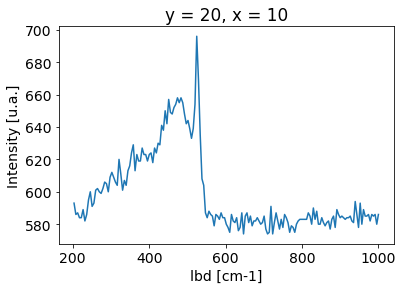

In [54]:
file = "C:\\my_modules_Python\\rhp_demo_files\\Large Area Scan_000_Spec_As cut.txt"
da_sliced, da_sliced_interp, da_full_spectrum, da_full_spectrum_interp = rhp.read_RAMAN_WITEC_2D(file,200,1000)
da_sliced.sel(x=10,y=20).plot()

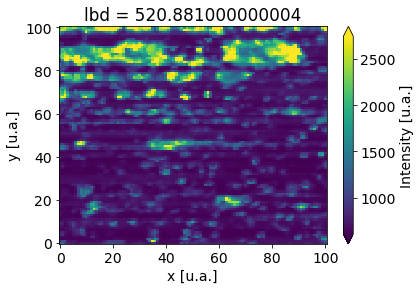

In [55]:
da_full_spectrum_interp.sel(lbd =521, method = "nearest").plot(robust=True)

# cosmic cleaning 
## cosmic cleaning and baseline removing of a spectrum

Block name WMAP not present in current measurement


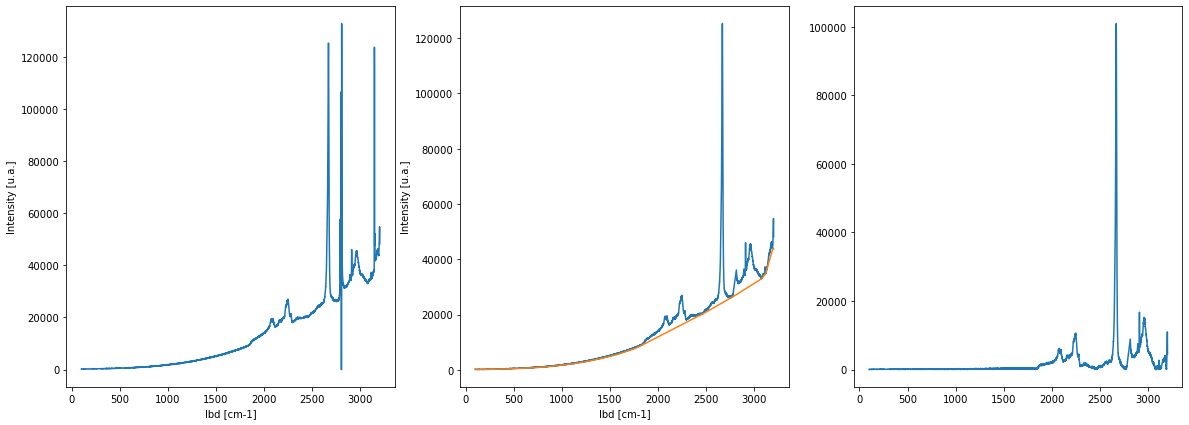

In [56]:
import raman_hyperspectra as rhp
import matplotlib.pyplot as plt
%matplotlib inline

file = r'C:\my_modules_Python\rhp_demo_files\wdf\SiC- 785 nm- 100%-1acc.wdf'
da_sliced, da_sliced_interp, da, da_interp = rhp.read_RENISHAW_wdf(file, lbd_dep = None, lbd_end = None )
db = rhp.remove_spikes(da)
#da_flatten = rhp.flatten_spectra(da_interp, ('arPLS',1.e5, 1.e-3, 40))
#z_ials, z_base_ials = rhp.flatten_spectra(db,('ials',10_000,  0.01, 0.001))
#z_ials, z_base_ials = rhp.flatten_spectra(da,('top hat',440))
z_ials, z_base_ials = rhp.flatten_spectra(db,('rubberband',))

fig = plt.figure(figsize = (20,7))
plt.subplot(1,3,1)
da.plot()
plt.subplot(1,3,2)
db.plot()
plt.plot(db.lbd.values,z_base_ials )
plt.subplot(1,3,3)
plt.plot(db.lbd.values,z_ials )
plt.subplots_adjust(wspace=0.2)

## cosmic cleaning of an hyperspectrum

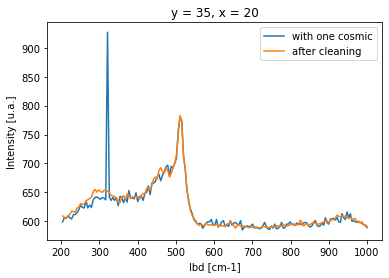

In [57]:
import raman_hyperspectra as rhp
import matplotlib.pyplot as plt
%matplotlib inline

file = "C:\\my_modules_Python\\rhp_demo_files\\Large Area Scan_000_Spec_As cut.txt"
da_sliced, da_sliced_interp, da_full_spectrum, da_full_spectrum_interp = rhp.read_RAMAN_WITEC_2D(file,200,1000)

x = 20.3  # µm
y = 35.4  # µm
lbd = 320  # cm-1

da_sliced.sel(x=x, y=y, lbd= lbd, method='nearest').values += 300 # add a spike
da_cosmic = rhp.cosmic_cleaning (da_sliced,Kmax = 17)

da_sliced.sel(x=x, y=y, method='nearest').plot(label ='with one cosmic')
da_cosmic.sel(x=x, y=y, method='nearest').plot(label ='after cleaning')
plt.legend()

# Spectra fitting
## 1 build a CSV file by copy and paste on of the following templates

In [59]:
import raman_hyperspectra as rhp
print(rhp.raman_hyperspectra_fit.__doc__)


Fits, using  the mean square method, a spectra/hyperstra. The ojective function is a sum of:
    - Gaussian(s)
    - bigaussian(s)
    - Lorentzian(s)
    - Voigt(s)
    - pseudo Voigt(s)
    
The fitting parameters are stored in an Excel/csv file. 

To obtain an initialization file, for a Gaussian model execute the following script:
with open(r'c:\Temp\modele.csv','w') as file:
    file.write("FITTING MODEL INITIALIZATION\n")
    file.write("Function type (column A) : Gaussian, Lorentzian, Bigaussian, Voigt, Pseudo_Voigt\n")
    file.write("B6 offset, B7,B8... C7,C8...must be blank. mask=1/0 the parameter is free/freezed.               Lbd_0, sigma_a, gamma are expressed in cm^-1\n")
    file.write(" ;offset;mask;Lbd_0;mask;h;mask;sigma_a (w_a);mask;sigma_b;mask;gamma;mask;gamma;mask\n")
    file.write("Gaussian;0;0;521;1;5000;1;5;1;;;;;;")

This file is parsed by the function init_model:

     param_fixed ,param_fit, func_type, index_fit, label = rhp.init_model(r'c:\Temp\modele.csv'

## 2 read/check your model

In [60]:
with open(r'c:\Temp\modele.csv','w') as file:
    file.write("FITTING MODEL INITIALIZATION\n")
    file.write("Function type (column A) : Gaussian, Lorentzian, Bigaussian, Voigt, Pseudo_Voigt\n")
    file.write("B6 offset, B7,B8... C7,C8...must be blank. mask=1/0 the parameter is free/freezed.               Lbd_0, sigma_a, gamma are expressed in cm^-1\n")
    file.write(" ;offset;mask;Lbd_0;mask;h;mask;sigma_a (w_a);mask;sigma_b;mask;gamma;mask;gamma;mask\n")
    file.write("Lorentzian;0;1;520;1;10000;1;;;;;5;1")
    
param_fixed ,param_fit, func_type, index_fit, label = rhp.init_model(r'c:\Temp\modele.csv')
print(f'param_fixed :{param_fixed}',f'param_fit :{param_fit}',f'func_type :{list(func_type)}' , \
      f'index_fit: {index_fit}',f'label: {label} ', sep='\n')

param_fixed :[0 0 0 0]
param_fit :[0.0e+00 5.2e+02 1.0e+04 5.0e+00]
func_type :['Lorentzian0']
index_fit: [0 1 2 3]
label: ['Lorentzian0  :  Offset = 0.0 ', 'Lorentzian0  :  Lbd_0 = 520.0 ', 'Lorentzian0  :  h = 10000.0 ', 'Lorentzian0  :  gamma = 5.0 '] 


## Fit your spectrum

Gaussian R2 = 0.9756


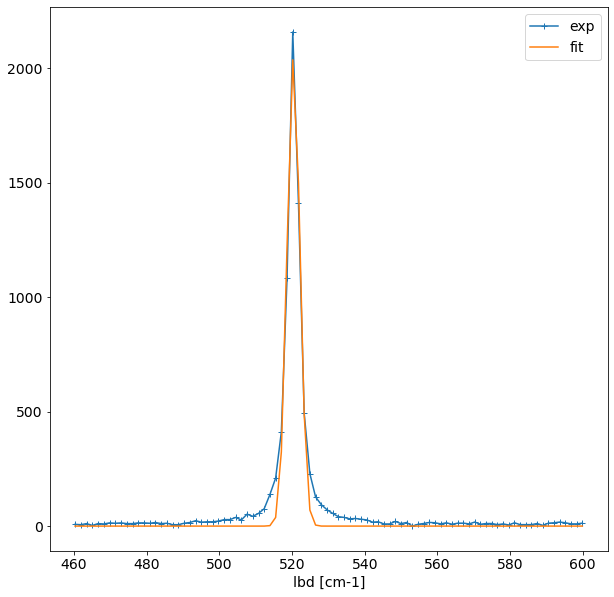

In [50]:
import raman_hyperspectra as rhp
import sys
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

file = "C:\\my_modules_Python\\rhp_demo_files\\RENISHAW_1D_Si.txt"
da_sliced, da_sliced_interp, da, da_interp = rhp.read_RAMAN_RENISHAW_txt_0D(file)

lbd_deb_fit = 460 # cm-1
lbd_end_fit = 600 # cm-1
top_hat_bandwidth = 440 # cm-1

z,z_base = rhp.flatten_spectra(da,('top hat',top_hat_bandwidth)) # baseline correction

dc = rhp.construct_xarray_0D( z, da.lbd.values )

popt, dc_fit, R2 = rhp.fit_Raman(dc.sel(lbd = slice(lbd_deb_fit,lbd_end_fit)), r'c:\Temp\modele.csv' )

fig = plt.figure(figsize = (10,10))
dc.sel(lbd = slice(lbd_deb_fit,lbd_end_fit)).plot(marker='+',label ='exp')
dc_fit.plot(label ='fit')
plt.legend(loc = 1)
print(f'{Model} R2 = {str(round(R2,4))}')

# DDDD

denoising with NRWRT: 100%|████████████████████████████████████████████████████| 10201/10201 [00:03<00:00, 2968.60it/s]


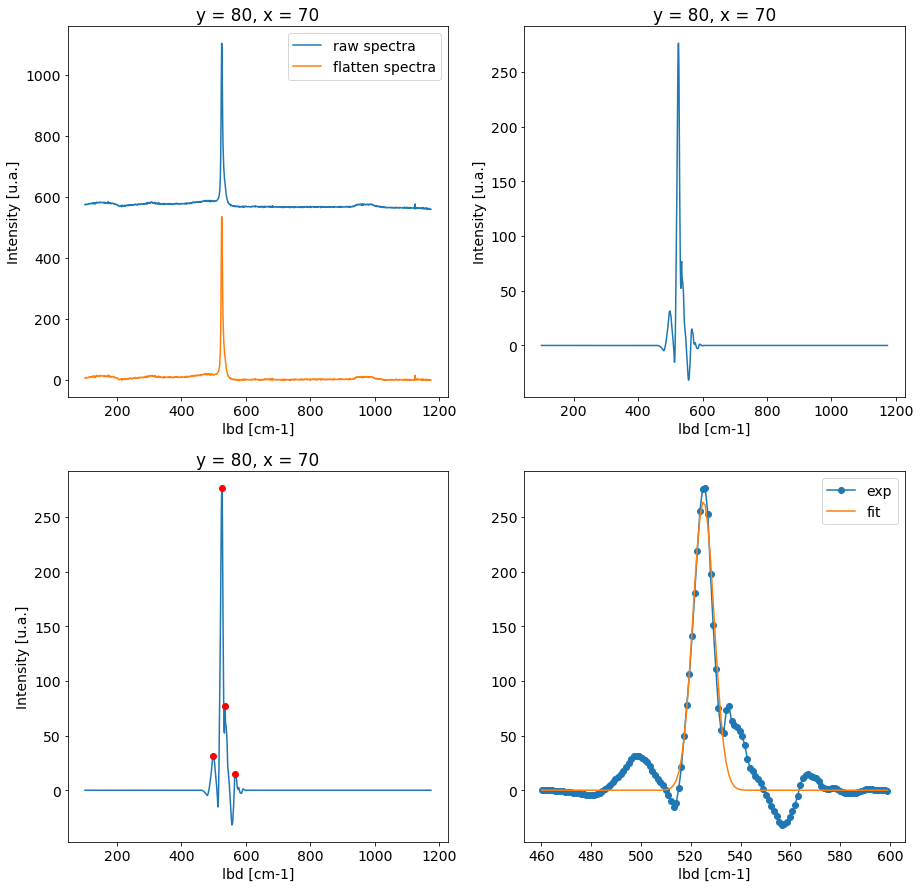

In [34]:
import raman_hyperspectra as rhp
import os
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

file_raw = 'C:\\Expert senior\\notes\\Fit_Raman\\5-New Centrif\\Wafer Ref-MB\\Export 02-01\\Large Area Scan_000_Spec.Data 1.txt'
file_model = 'C:\\Temp\\Interface Raman_hyperspectra_V3.xlsx'
path_save = "c:\\Temp"

os.chdir( path_save )
da_raw_2D, da_raw_interp_2D, da_full_spectrum_2D,da_full_spectrum_interp_2D  = rhp.read_RAMAN_WITEC_2D(file_raw,
                                                                                                       lbd_dep = 100,
                                                                                                       lbd_end = 1200)
da_flatten_2D = rhp.flatten_hyperspectra(da_raw_interp_2D,("top hat", 440))

da_noise = rhp.spectra_noise_estimation(da_cosmic,
                                       ("Savitzky-Golay",7, 3), 
                                       ("Gauss",1.7),
                                       lbd_inf_var = 100,
                                       lbd_sup_var = 480)

da_denoise_2D = rhp.denoise_hyperspectra(da_flatten_2D, ('NRWRT',
                                                        da_noise.sel(Filter = 'Gauss').values,
                                                        4,
                                                        "db4",
                                                        "soft",
                                                        0.9))

idx_row = 70
idx_col = 80
lbd_deb_fit,lbd_end_fit = 460, 600
Model = "Gaussian"


fig = plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
da_raw_interp_2D.isel(x=idx_row, y=idx_col).plot(label = 'raw spectra')
da_flatten_2D.isel(x=idx_row, y=idx_col).plot(label = 'flatten spectra')
plt.title = 'Baseline correction'
plt.legend()

plt.subplot(2,2,2)
da_denoise_2D.isel(x=idx_row, y=idx_col).plot(label = 'flatten spectra')
lbd = da_denoise_2D.isel(x=idx_row, y=idx_col).lbd.lbd.values
z = da_denoise_2D.isel(x=idx_row, y=idx_col).values
idx_max = rhp.find_MAX(z, 
                           lbd, 
                           Ecart = 5, 
                           prominence = 0.5, 
                           height = 3)
plt.subplot(2,2,3)
da_denoise_2D.isel(x=idx_row, y=idx_col).plot(label = 'flatten spectra')
plt.plot(lbd[idx_max], z[idx_max], 'or')


plt.subplot(2,2,4)
dc = rhp.construct_xarray_0D( z, lbd )

popt,  dc_fit, R2 = rhp.fit_Raman(dc.sel(lbd = slice(lbd_deb_fit,lbd_end_fit)), file_model, sheet = Model )
dc.sel(lbd = slice(lbd_deb_fit,lbd_end_fit)).plot(marker='o',label ='exp')
dc_fit.plot(label ='fit')
plt.legend(loc = 1)

# PCA analysis of an hyperspectrum

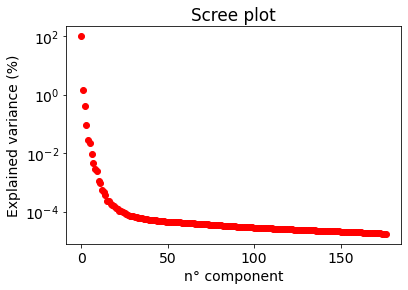

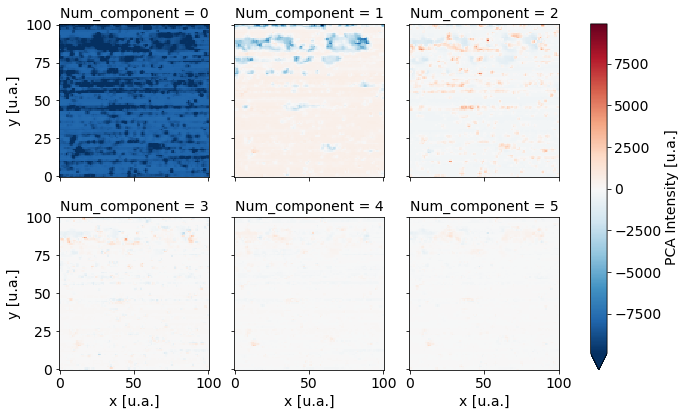

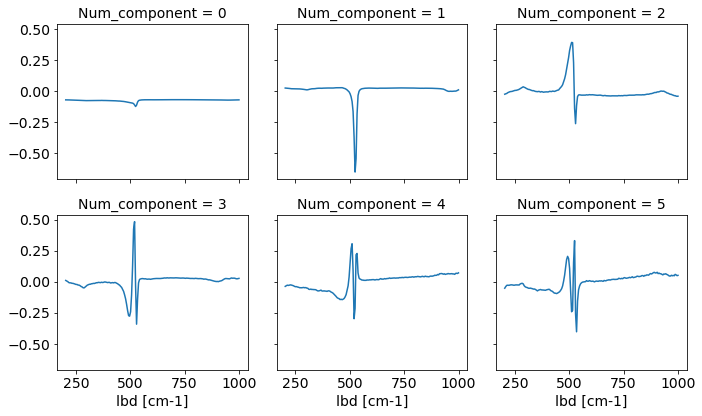

In [23]:
import raman_hyperspectra as rhp
file = "C:\\my_modules_Python\\rhp_demo_files\\Large Area Scan_000_Spec_As cut.txt"
da_sliced, da_sliced_interp, da_full_spectrum, da_full_spectrum_interp = rhp.read_RAMAN_WITEC_2D(file,200,1000)

Eigen_value, F, L = rhp.Raman_PCA(da_sliced, k_PCA=6)

# NMF analysis of an hyperspectrum

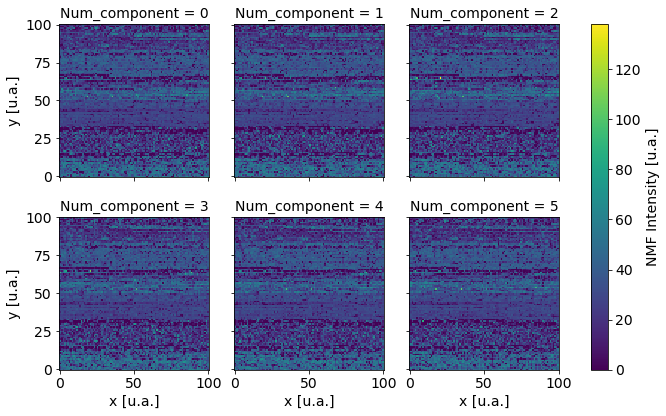

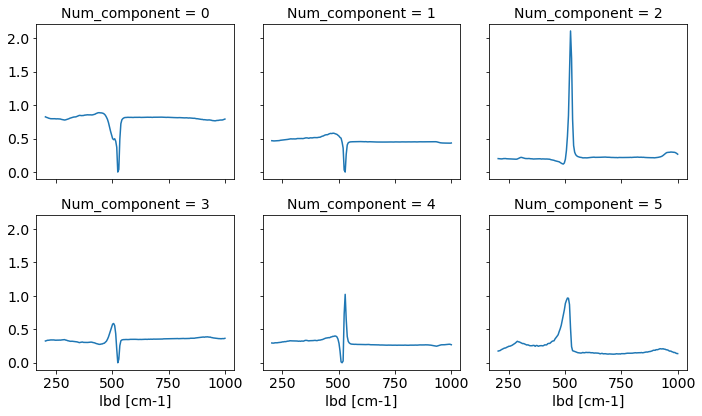

In [25]:
import raman_hyperspectra as rhp
file = "C:\\my_modules_Python\\rhp_demo_files\\Large Area Scan_000_Spec_As cut.txt"
da_sliced, da_sliced_interp, da_full_spectrum, da_full_spectrum_interp = rhp.read_RAMAN_WITEC_2D(file,200,1000)
W,H = rhp.Raman_NMF(da_sliced,k_NMF = 6)

# robust PCA

In [61]:
import raman_hyperspectra as rhp
file = "C:\\my_modules_Python\\rhp_demo_files\\Large Area Scan_000_Spec_As cut.txt"
da_sliced, da_sliced_interp, da_full_spectrum, da_full_spectrum_interp = rhp.read_RAMAN_WITEC_2D(file,200,1000)
X,Y = rhp.Raman_Robust_PCA(da_sliced)

Itn   Fnc       NrmNuc    Nrmℓ1     Cnstr     r         s         ρ       
--------------------------------------------------------------------------
   0  1.23e+06  1.23e+06  1.07e+05  5.11e+01  5.70e-05  1.51e+00  1.20e-01
   1  1.23e+06  1.23e+06  1.20e+05  4.90e+01  5.47e-05  1.40e+00  1.20e-01
   2  1.20e+06  1.14e+06  6.11e+06  5.76e+03  6.43e-03  9.46e-01  7.50e-04
   3  1.20e+06  1.04e+06  1.54e+07  2.11e+04  2.36e-02  2.74e-01  6.18e-05
   4  1.18e+06  9.63e+05  2.19e+07  3.61e+04  4.03e-02  1.31e-01  1.81e-05
   5  1.20e+06  9.14e+05  2.85e+07  3.78e+04  4.22e-02  6.62e-02  1.01e-05
   6  1.19e+06  9.07e+05  2.83e+07  3.05e+04  3.41e-02  3.76e-02  8.03e-06
   7  1.17e+06  9.33e+05  2.44e+07  2.26e+04  2.52e-02  3.24e-02  8.03e-06
   8  1.18e+06  9.59e+05  2.25e+07  1.83e+04  2.05e-02  2.15e-02  7.08e-06
   9  1.17e+06  9.62e+05  2.09e+07  1.42e+04  1.59e-02  1.39e-02  7.08e-06
  10  1.15e+06  9.54e+05  1.95e+07  1.12e+04  1.25e-02  1.18e-02  7.08e-06
  11  1.14e+06  9.49e+05 

 108  1.12e+06  9.69e+05  1.55e+07  5.28e+02  5.89e-04  4.94e-04  3.59e-05
 109  1.12e+06  9.69e+05  1.55e+07  5.21e+02  5.81e-04  4.74e-04  3.59e-05
 110  1.12e+06  9.69e+05  1.55e+07  5.13e+02  5.73e-04  5.31e-04  3.97e-05
 111  1.12e+06  9.69e+05  1.56e+07  5.06e+02  5.64e-04  5.26e-04  3.97e-05
 112  1.12e+06  9.69e+05  1.56e+07  4.98e+02  5.56e-04  5.10e-04  3.97e-05
 113  1.12e+06  9.69e+05  1.55e+07  4.91e+02  5.48e-04  5.24e-04  3.97e-05
 114  1.12e+06  9.69e+05  1.55e+07  4.84e+02  5.40e-04  5.22e-04  3.97e-05
 115  1.12e+06  9.69e+05  1.55e+07  4.77e+02  5.33e-04  4.88e-04  3.97e-05
 116  1.12e+06  9.69e+05  1.55e+07  4.70e+02  5.25e-04  4.98e-04  3.97e-05
 117  1.12e+06  9.70e+05  1.55e+07  4.63e+02  5.17e-04  5.04e-04  3.97e-05
 118  1.12e+06  9.69e+05  1.55e+07  4.57e+02  5.10e-04  4.66e-04  3.97e-05
 119  1.12e+06  9.69e+05  1.55e+07  4.51e+02  5.03e-04  4.53e-04  3.97e-05
 120  1.12e+06  9.69e+05  1.55e+07  4.45e+02  4.96e-04  4.63e-04  3.97e-05
-------------------------

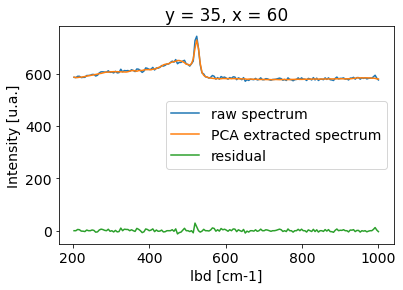

In [69]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

x = 60.3  # µm
y = 35.4  # µm

da_sliced.sel(x=x, y=y, method='nearest').plot(label = 'raw spectrum')
X.sel(x=x, y=y, method='nearest').plot(label = 'PCA extracted spectrum')
Y.sel(x=x, y=y, method='nearest').plot(label = 'residual')
plt.legend()